### Visualize key MHW events from Ocetrac

In [1]:
# Data analysis libraries 
import s3fs
import sys
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import holoviews as hv
from holoviews.operation.datashader import regrid

ModuleNotFoundError: No module named 'datashader'

#### Load Ocetrac labels

In [7]:
ocetrac = xr.open_dataset('~/marine-heatwaves/data/ocetrac_labels.nc')
labels = ocetrac.blobs

In [10]:
labels.time

<xarray.DataArray 'time' (time: 478)>
array(['1981-09-01T00:00:00.000000000', '1981-10-01T00:00:00.000000000',
       '1981-11-01T00:00:00.000000000', ..., '2021-04-01T00:00:00.000000000',
       '2021-05-01T00:00:00.000000000', '2021-06-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2021-06-01

#### Load SST anomalies

In [8]:
oisst = xr.open_dataset('~/marine-heatwaves/data/preprocessed_oisst.nc')
ssta = oisst.ssta_notrend

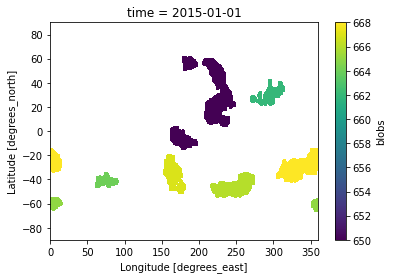

In [12]:
labels.sel(time='2015-01-01').plot()

In [ ]:
hv.extension('bokeh', 'matplotlib')

grid_style = {'grid_line_color': 'black', 'grid_line_width': 1.5, 'ygrid_bounds': (0.3, 0.7),
              'minor_xgrid_line_color': 'lightgray', 'xgrid_line_dash': [4, 4]}

im_x = (hv.Dataset(labels).to(hv.Image, ['Longitude', 'Latitude'], name='Labels', dynamic=True)
                .options(cmap='Viridis', width=700, height=350, colorbar=True, tools=['hover'],
                         title='Ocetrac Labels'))

# im_y = (hv.Dataset(ds.y).to(hv.Image, ['x0', 'y0'], name='Y', dynamic=True)
#                 .options(cmap='Magma', width=700, height=350, colorbar=True, tools=['hover'],
#                          show_grid=True, #gridstyle=grid_style,
#                          title='Particle Final Latitude'))

(regrid(im_x, precompute=True)).cols(1)